<center>
    <h2>
        Social Network Analysis
    </h2>
    <h3>
        Building and Analyzing a Global Co-Authorship Network Using Google Scholar Data
    </h3>
</center>

<br>

<b>Student</b>: Matteo Donati <br>
<b>Student ID.</b>: 0001032227 <br>
<b>E-mail</b>: matteo.donati10@studio.unibo.it

<br>

This notebook is an implementation of the paper by Chen *et al*., (2017)<sup>[[1]](#references)</sup><sup>[[2]](#references)</sup>.

### Libraries

In [30]:
# Installing LaTeX. This is not mandatory, and it is used to plot using LaTex.
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apach

In [31]:
!git clone https://github.com/chenyang03/co-authorship-network

fatal: destination path 'co-authorship-network' already exists and is not an empty directory.


In [32]:
# Importing networkx.
import networkx as nx

# Importing numpy.
import numpy as np

# Importing pyplot.
import matplotlib.pyplot as plt

# Importing time.
import time

# Importing stats from scipy.
from scipy import stats

# Using TeX. This is not mandatory, and it is used to plot using LaTex.
plt.rc("text", usetex = True)

# Setting the font family. This is not mandatory, and it is used to plot using LaTex.
plt.rc("font", family = "serif")

# Setting the font size. This is not mandatory, and it is used to plot using LaTex.
plt.rcParams.update({"font.size": 15})

# Using package amsmath. This is not mandatory, and it is used to plot using LaTex.
plt.rcParams["text.latex.preamble"] = [r"\usepackage{amsmath}"]

### Network Definition

The network files are parsed and stored in specific lists.

In [12]:
# Reading nodes file.
with open("co-authorship-network/nodes.txt") as f:
    nodes = f.readlines()

# Reading edges file.
with open("co-authorship-network/edges.txt") as f:
    edges = f.readlines()

# Reading nodes information file.
with open("co-authorship-network/gs_info.txt") as f:
    info = f.readlines()

# Casting nodes elements to integers.
nodes = [eval(i) for i in nodes]

# Casting edges elements to integer tuples.
edges = [eval(i) for i in edges]

# Replacing " " with ",".
info = [i.replace(" ", ",") for i in info]

# Casting info elements to integer tuples.
info = [eval(i) for i in info]

# Creating the list of dictionaries containing the nodes attributes.
info = [{"id": i[0], "total_number_of_citations": i[1], "h_index": i[2], "g_index": i[3], "academic_title": i[4], "computer_science_author": i[5], "biology_author": i[6], "sociology_author": i[7]} for i in info]

The aforementioned lists are used to create a specific `Graph` object.

In [13]:
# Creating the graph.
G = nx.Graph()

# Adding nodes.
G.add_nodes_from(list(zip(nodes, info)))

# Adding edges.
G.add_edges_from(edges)

# Printing the number of nodes and edges.
G.number_of_nodes(), G.number_of_edges()

(402392, 1234019)

### Network Analysis

In [33]:
# Auxiliary function used to plot measures.
def plot(x, y, xlabel, ylabel, xlim, ylim, filename, marker = False):
  fig, ax = plt.subplots(1, 1, figsize = (6, 4))
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  if marker:
    ax.plot(x, y, color = "k", marker = ".",  mfc = "none", markersize = 12, mew = 1.5, clip_on = False)
  else:
    ax.plot(x, y, color = "k")
  fig.savefig(f"{filename}.pdf", bbox_inches = "tight")
  plt.show()

# Auxiliary function used to plot measures.
def hist_plot(x, bins, xlabel, ylabel, filename, format = False):
  fig, ax = plt.subplots(1, 1, figsize = (6, 4))
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  if format:
    ax.ticklabel_format(style = "sci", axis = "y", scilimits = (0, 0))
  ax.hist(x, bins = bins, color = "k")
  fig.savefig(f"{filename}.pdf", bbox_inches = "tight")
  plt.show()

The density of the network is computed.

In [34]:
# Computing and printing the density of the graph.
print(f"The density of G is: {nx.density(G)}.")

The density of G is: 1.5242431280399412e-05.


The degree of each node in the network is computed.

In [35]:
# Computing the list of nodes' degree.
degrees = [degree for (node, degree) in G.degree()]

# Printing the average degree of network G.
print(f"The average degree of network G is: {np.mean(degrees)}.")

The average degree of network G is: 6.1334171653512.


In [36]:
# Printing the median value of the degrees in G.
print(f"The median value of the degrees in G is: {np.median(degrees)}.")

The median value of the degrees in G is: 2.0.


In [37]:
# Printing the maximum value of the degrees in G.
print(f"The maximum degree value of G is: {np.max(degrees)}.")

The maximum degree value of G is: 463.


In [38]:
# Printing the minimum value of the degrees in G.
print(f"The minimum degree value of G is: {np.min(degrees)}.")

The minimum degree value of G is: 0.


Both the cumulative distribution function, as well as the probability distribution of the degrees of the network are plotted.

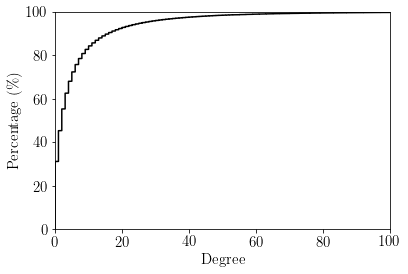

In [39]:
# Plotting the CDF of the degrees of G.
plot(np.sort(degrees), np.arange(len(degrees)) / float(len(degrees)) * 100, "Degree", r"Percentage (\%)", [0, 100], [0, 100], "degrees_CDF")

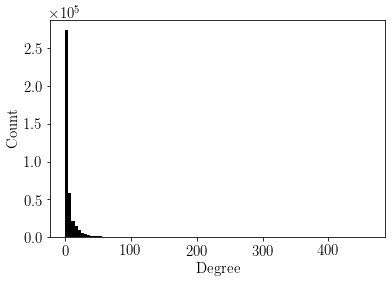

In [40]:
# Plotting the distribution of degrees.
hist_plot(degrees, 100, "Degree", "Count", "degrees_distribution", format = True)

The clustering coefficient of each node in the network is computed.

In [41]:
# Computing the list of nodes' clustering coefficient.
clustering_coefficients = list(nx.clustering(G).values())

# Plotting the average clustering coefficient of network G.
print(f"The average clustering coefficient of network G is: {np.mean(clustering_coefficients)}.")

The average clustering coefficient of network G is: 0.19784841407184786.


In [42]:
# Printing the maximum value of the clustering coefficient in G.
print(f"The maximum clustering coefficient value of G is: {np.max(clustering_coefficients)}.")

The maximum clustering coefficient value of G is: 1.0.


In [43]:
# Printing the minimum value of the clustering coefficient in G.
print(f"The minimum clustering coefficient value of G is: {np.min(clustering_coefficients)}.")

The minimum clustering coefficient value of G is: 0.0.


Both the cumulative distribution function, as well as the probability distribution of the clustering coefficients of the network are plotted.

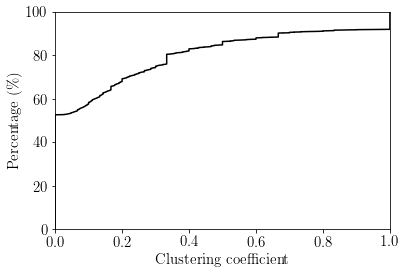

In [44]:
# Plotting the CDF of the clustering coefficients of G.
plot(np.sort(clustering_coefficients), np.arange(len(clustering_coefficients)) / float(len(clustering_coefficients)) * 100, "Clustering coefficient", r"Percentage (\%)", [0, 1], [0, 100], "clustering_coefficients_CDF")

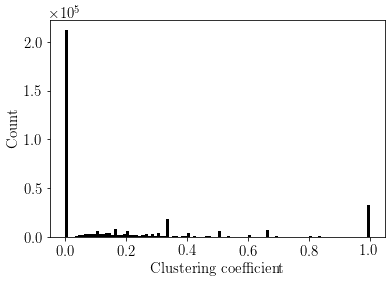

In [45]:
# Plotting the distribution of clustering_coefficients.
hist_plot(clustering_coefficients, 100, "Clustering coefficient", "Count", "clustering_coefficients_distribution", format = True)

The PageRank of each node in the network is computed.

In [46]:
# Computing the list of nodes' pagerank.
pageranks = list(nx.pagerank(G).values())

# Plotting the average pagerank of network G.
print(f"The average PageRank of network G is: {np.mean(pageranks)}.")

The average PageRank of network G is: 2.4851388695604847e-06.


In [47]:
# Printing the maximum value of the pageranks in G.
print(f"The maximum PageRank value of G is: {np.max(pageranks)}.")

The maximum PageRank value of G is: 0.00010648911202899722.


In [48]:
# Printing the minimum value of the pageranks in G.
print(f"The minimum RageRank value of G is: {np.min(pageranks)}.")

The minimum RageRank value of G is: 6.455971825048254e-07.


Both the cumulative distribution function, as well as the probability distribution of the PageRanks of the network are plotted.

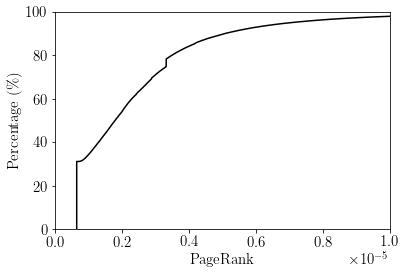

In [49]:
# Plotting the CDF of the clustering coefficients of G.
plot(np.sort(pageranks), np.arange(len(pageranks)) / float(len(pageranks)) * 100, "PageRank", r"Percentage (\%)", [0, 1e-5], [0, 100], "pageranks_CDF")

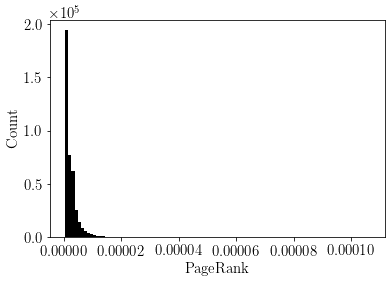

In [50]:
# Plotting the distribution of pageranks.
hist_plot(pageranks, 100, "PageRank", "Count", "pageranks_distribution", format = True)

In [51]:
# Computing the average h-index.
avg_h_index = np.mean([data["h_index"] for node, data in list(G.nodes(data = True))])

# Printing the average h-index of G.
print(f"The average h-index of G is: {avg_h_index}.")

# Computing the average g-index.
avg_g_index = np.mean([data["g_index"] for node, data in list(G.nodes(data = True))])

# Printing the average g-index of G.
print(f"The average g-index of G is: {avg_g_index}.")

The average h-index of G is: 8.335006660172171.
The average g-index of G is: 16.67030159645321.


The connected components of the network are computed and analysed.

In [ ]:
# Printing the number of connected components.
print(f"The number of connected connected components is: {nx.number_connected_components(G)}.")

The number of connected connected components is: 133159.


In [ ]:
# Computing all the connected components.
cc = [c for c in sorted(nx.connected_components(G), key = len, reverse = True)]

# Printing the size of the largest connected component.
print(f"The size of the largest connected component is: {len(cc[0])}.")

The size of the largest connected component is: 258949.


In [ ]:
# Printing the size of the 2nd, 3rd, 4th and 5th connected component.
print(f"The 2nd to 5th largest connected components have {len(cc[1])}, {len(cc[2])}, {len(cc[3])}, and {len(cc[4])} nodes, respectively.")

The 2nd to 5th largest connected components have 14, 14, 13, and 13 nodes, respectively.


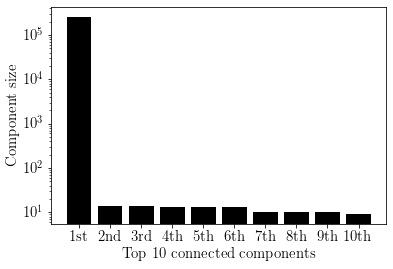

In [ ]:
# Plotting the size of the first ten connected components.
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
ax.set_xlabel("Top 10 connected components")
ax.set_ylabel("Component size")
ax.set_yscale("log")
ax.set_xticks(np.arange(0, 10, 1, dtype = int))
ax.set_xticklabels(["1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "10th"])
ax.bar(np.arange(0, 10, 1, dtype = int), [len(c) for c in cc[:10]], color = "k")
fig.savefig(f"components_size.pdf", bbox_inches = "tight")
plt.show()

In [ ]:
# Printing the number of singletons.
print(f"Among all connected components, {sum(len(c) == 1 for c in cc)} of them are singletons.")

Among all connected components, 125318 of them are singletons.


A new `Graph` object is created by considering the largest connected component only.

In [ ]:
# Extracting the subgraph of G related to the largest connected component.
H = G.subgraph(list(cc[0]))

Being `H` a large network, computing the shortest path between all pairs of nodes is computationally expensive.

In [ ]:
%%time

# Computing the first node's shortest path lengths.
_ = next(nx.all_pairs_shortest_path_length(H))

CPU times: user 6.74 s, sys: 76.3 ms, total: 6.81 s
Wall time: 6.98 s


Therefore, in order to compute the average shortest path between any pair of nodes, sampling techniques will be adopted. In particular, the following cell of code computes the shortest path of the first nodes in `H`. The number of considered nodes is determined by the `N_SECONDS` variable, which defines for how long the `while` loop has to be iterated. Fortunately enough, the average shortest path computed using sampling approximates very well the real value ($5.96$).

In [ ]:
# Defining the shortest path lengths generator.
generator = nx.all_pairs_shortest_path_length(H)

# Temporary variable used to store the number of used nodes.
n_nodes = 0

# Temporary list of shortest path lengths.
shortest_path_lengths = []

# Number of seconds for which to compute the shortest path lengths.
N_SECONDS = 600

# Starting a timer.
start = time.time()

# Iterating over the first 20 nodes of H.
while True:

  # Checking the timer.
  if time.time() - start >= N_SECONDS:

    # Breaking the loop if N_SECONDS seconds have passed.
    break

  # Computing the next node's shortest path lengths.
  path = next(generator)

  # Updating the number of considered nodes.
  n_nodes = n_nodes + 1

  # Updating the list of shortest path lengths.
  shortest_path_lengths.append(list(path[1].values()))

# Printing the average shortest path.
print(f"The average shortest path length is {np.sum(shortest_path_lengths) / (n_nodes * (len(path[1].values()) - 1))}.")

The average shortest path length is 5.930824506197265.


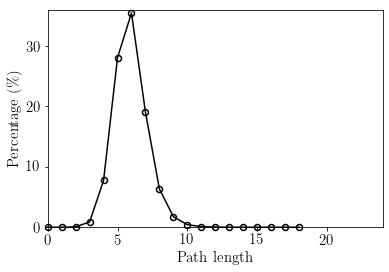

In [ ]:
# Computing the unique values and their counts in shortest_path_lengths.
lengths, counts = np.unique(shortest_path_lengths, return_counts = True) 

# Plotting the distribution of path lengths.
plot(lengths, (counts / np.sum(counts)) * 100, "Path length", r"Percentage (\%)", [0, 24], [0, 36], "path_lengths_distribution", marker = True)

In [ ]:
# Computing the list of nodes' clustering coefficient.
clustering_coefficients_H = list(nx.clustering(H).values())

# Plotting the average clustering coefficient of network H.
print(f"The average clustering coefficient of network H is: {np.mean(clustering_coefficients_H)}.")

The average clustering coefficient of network H is: 0.2992787087577181.


The robustness of the network is tested by removing specific percentages of high-degree nodes from the original network, and then by analysing the connected components of the remaining network.

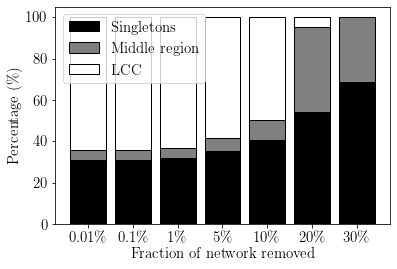

In [ ]:
# Computing the list containing each (node, degree) tuple.
node_degree_list = list(G.degree())

# Ordering (based on degree value, in descending order) the list containing each (node, degree) tuple.
node_degree_list.sort(key = lambda x: x[1], reverse = True)

# Defining the list containing the removal %s.
percentages = [0.01, 0.1, 1, 5, 10, 20, 30]

# Defining the list that will store the largest connected component %s.
lcc_percentages = []

# Defining the list that will store the singletons %s.
singletons_percentages = []

# Defining the list that will store the middle region %s.
middle_region_percentages = []

# Iterating over removal percentages.
for i in range(len(percentages)):

  # Creating a copy of G.
  G_copy = G.copy()

  # Computing the list of nodes to remove.
  remove = [node for node, degree in node_degree_list[:int(len(node_degree_list) * percentages[i] / 100) + 1]]

  # Removing the nodes.
  G_copy.remove_nodes_from(remove)

  # Computing the new number of nodes.
  total_nodes = len(G_copy.nodes())

  # Computing all the connected components.
  cc = [c for c in sorted(nx.connected_components(G_copy), key = len, reverse = True)]

  # Computing the number of singletons.
  n_singletons = sum(len(c) == 1 for c in cc)

  # Computing percentage of nodes in the largest connected component.
  lcc_percentages.append(len(cc[0]) * 100 / total_nodes)

  # Computing percentage of singletons.
  singletons_percentages.append(n_singletons * 100 / total_nodes)

  # Computing percentage of middle region.
  middle_region_percentages.append(100 - lcc_percentages[i] - singletons_percentages[i])

# Plotting the analysis of the graphs obtained by removing nodes.
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
ax.set_xlabel("Fraction of network removed")
ax.set_ylabel(r"Percentage (\%)")
ax.set_xticks(np.arange(0, 7, 1, dtype = int))
ax.set_xticklabels([r"0.01\%", r"0.1\%", r"1\%", r"5\%", r"10\%", r"20\%", r"30\%"])
ax.bar(np.arange(0, 7, 1, dtype = int), singletons_percentages, label = "Singletons", color = "k", edgecolor = "k")
ax.bar(np.arange(0, 7, 1, dtype = int), middle_region_percentages, bottom = singletons_percentages, label = "Middle region", color = "gray", edgecolor = "k")
ax.bar(np.arange(0, 7, 1, dtype = int), lcc_percentages, bottom = np.array(singletons_percentages) + np.array(middle_region_percentages), label = "LCC", color = "white", edgecolor = "k")
ax.legend(loc = "upper left")
fig.savefig(f"graphs_with_nodes_removed.pdf", bbox_inches = "tight")
plt.show()

The average degree, clustering coefficient, PageRank, H-index, and G-index is computed among authors having the same academic title, and working in the same field.

In [ ]:
# Dictionary containing academic titles key-value pairs.
titles = {1: "student", 2: "postdoc", 3: "professor"}

# Function which computes the analysis for a specific academic title.
def analysis_for_specific_title(title):

  # List of nodes of group i.
  group = [node for node, data in list(G.nodes(data = True)) if data["academic_title"] == title]

  # Printing the average degree of group i.
  print(f"The average degree of group \"{titles[title]}\" is: {np.sum(np.array(degrees)[group]) / len(group)}.")

  # Printing the average clustering coefficient of group i.
  print(f"The average clustering coefficient of group \"{titles[title]}\" is: {np.sum(np.array(clustering_coefficients)[group]) / len(group)}.")

  # Printing the average pagerank of group i.
  print(f"The average PageRank of group \"{titles[title]}\" is: {np.sum(np.array(pageranks)[group]) / len(group)}.")

  # Computing the average h-index.
  avg_h_index = np.sum([data["h_index"] for node, data in list(G.nodes(data = True)) if data["academic_title"] == title]) / len(group)

  # Computing the average g-index.
  avg_g_index = np.sum([data["g_index"] for node, data in list(G.nodes(data = True)) if data["academic_title"] == title]) / len(group)

  # Printing the average h-index of group i.
  print(f"The average h-index of group \"{titles[title]}\" is: {avg_h_index}.")

  # Printing the average g-index of group i.
  print(f"The average g-index of group \"{titles[title]}\" is: {avg_g_index}.")

# Iterating over academic titles.
for i in range(1, 4):

  # Computing analysis for title i.
  analysis_for_specific_title(i)

The average degree of group "student" is: 1.9396551724137931.
The average clustering coefficient of group "student" is: 0.22375508944073466.
The average PageRank of group "student" is: 1.3974213412141979e-06.
The average h-index of group "student" is: 2.2187310949788266.
The average g-index of group "student" is: 4.285276769509982.
The average degree of group "postdoc" is: 4.687944421740907.
The average clustering coefficient of group "postdoc" is: 0.27631312469655805.
The average PageRank of group "postdoc" is: 2.1339253322511707e-06.
The average h-index of group "postdoc" is: 6.139027380465876.
The average g-index of group "postdoc" is: 12.65132815692685.
The average degree of group "professor" is: 9.392989993781447.
The average clustering coefficient of group "professor" is: 0.15992348887946675.
The average PageRank of group "professor" is: 3.3144804473146906e-06.
The average h-index of group "professor" is: 12.676601277630166.
The average g-index of group "professor" is: 25.5441799

In [ ]:
# Function which computes the analysis for a specific field of science.
def analysis_for_specific_field(field):

  # List of nodes of group "field".
  group = [node for node, data in list(G.nodes(data = True)) if data[field] == 1]

  # Printing the average degree of group "field".
  print(f"The average degree based on \"{field}\" is: {np.sum(np.array(degrees)[group]) / len(group)}.")

  # Printing the average clustering coefficient of group "field".
  print(f"The average clustering coefficient based on \"{field}\" is: {np.sum(np.array(clustering_coefficients)[group]) / len(group)}.")

  # Printing the average pagerank of group "field".
  print(f"The average PageRank based on \"{field}\" is: {np.sum(np.array(pageranks)[group]) / len(group)}.")

  # Computing the average h-index.
  avg_h_index = np.sum([data["h_index"] for node, data in list(G.nodes(data = True)) if data[field] == 1]) / len(group)

  # Computing the average g-index.
  avg_g_index = np.sum([data["g_index"] for node, data in list(G.nodes(data = True)) if data[field] == 1]) / len(group)

  # Printing the average h-index of group "field".
  print(f"The average h-index based on \"{field}\" is: {avg_h_index}.")

  # Printing the average g-index of group "field".
  print(f"The average g-index based on \"{field}\" is: {avg_g_index}.")

# Computing analysis for computer science.
analysis_for_specific_field("computer_science_author")

# Computing analysis for biology.
analysis_for_specific_field("biology_author")

# Computing analysis for sociology.
analysis_for_specific_field("sociology_author")

The average degree based on "computer_science_author" is: 8.541414555360028.
The average clustering coefficient based on "computer_science_author" is: 0.23749568296282517.
The average PageRank based on "computer_science_author" is: 2.823313517020209e-06.
The average h-index based on "computer_science_author" is: 8.322614082877323.
The average g-index based on "computer_science_author" is: 16.83349805944604.
The average degree based on "biology_author" is: 7.795497869137091.
The average clustering coefficient based on "biology_author" is: 0.2188148572758744.
The average PageRank based on "biology_author" is: 2.853969392064543e-06.
The average h-index based on "biology_author" is: 10.424035647940165.
The average g-index based on "biology_author" is: 21.29087796408494.
The average degree based on "sociology_author" is: 5.567415730337078.
The average clustering coefficient based on "sociology_author" is: 0.17560493370275798.
The average PageRank based on "sociology_author" is: 2.5647326057

### Correlation Analysis

The correlation between the co-authorship network (degree, clustering coefficient, PagaRank) and the citation metrics (total number of citations, H-index, G-index) is computed by using the Pearson correlation coefficient.

In [ ]:
# Computing the list of total number of citations.
total_number_of_citations = [data["total_number_of_citations"] for node, data in list(G.nodes(data = True))]

# Computing the list of h-indexes.
h_indexes = [data["h_index"] for node, data in list(G.nodes(data = True))]

# Computing the list of g-indexes.
g_indexes = [data["g_index"] for node, data in list(G.nodes(data = True))]

# Printing the Pearson correlation coefficients.
print(f"The Pearson correlation coefficient between total_number_of_citations and degrees is {stats.pearsonr(total_number_of_citations, degrees)[0]}.")
print(f"The Pearson correlation coefficient between total_number_of_citations and clustering_coefficients is {stats.pearsonr(total_number_of_citations, clustering_coefficients)[0]}.")
print(f"The Pearson correlation coefficient between total_number_of_citations and pageranks is {stats.pearsonr(total_number_of_citations, pageranks)[0]}.")
print(f"The Pearson correlation coefficient between h_indexes and degrees is {stats.pearsonr(h_indexes, degrees)[0]}.")
print(f"The Pearson correlation coefficient between h_indexes and clustering_coefficients is {stats.pearsonr(h_indexes, clustering_coefficients)[0]}.")
print(f"The Pearson correlation coefficient between h_indexes and pageranks is {stats.pearsonr(h_indexes, pageranks)[0]}.")
print(f"The Pearson correlation coefficient between g_indexes and degrees is {stats.pearsonr(g_indexes, degrees)[0]}.")
print(f"The Pearson correlation coefficient between g_indexes and clustering_coefficients is {stats.pearsonr(g_indexes, clustering_coefficients)[0]}.")
print(f"The Pearson correlation coefficient between g_indexes and pageranks is {stats.pearsonr(g_indexes, pageranks)[0]}.")

The Pearson correlation coefficient between total_number_of_citations and degrees is 0.5282246549685807.
The Pearson correlation coefficient between total_number_of_citations and clustering_coefficients is -0.027465731381683865.
The Pearson correlation coefficient between total_number_of_citations and pageranks is 0.5303918116000303.
The Pearson correlation coefficient between h_indexes and degrees is 0.6785437418102267.
The Pearson correlation coefficient between h_indexes and clustering_coefficients is 0.01637827921524193.
The Pearson correlation coefficient between h_indexes and pageranks is 0.7280814186653497.
The Pearson correlation coefficient between g_indexes and degrees is 0.6490288524338288.
The Pearson correlation coefficient between g_indexes and clustering_coefficients is 0.021569904720877657.
The Pearson correlation coefficient between g_indexes and pageranks is 0.6780007968789739.


Lastly, an assortativity coefficient based on academic title, H-index, and G-index is computed.

In [ ]:
# Considering nodes with a defined academic title.
nodes_with_title = [node for node, data in list(G.nodes(data = True)) if data["academic_title"] == 1 or data["academic_title"] == 2 or data["academic_title"] == 3]

# Computing and printing the assortatity coefficient based on attributes.
print("The assortativity coefficient based on academic title is: {}.".format(nx.numeric_assortativity_coefficient(G, "academic_title", nodes = nodes_with_title)))
print("The assortativity coefficient based on h-index is: {}.".format(nx.numeric_assortativity_coefficient(G, "h_index", nodes = nodes_with_title)))
print("The assortativity coefficient based on g-index is: {}.".format(nx.numeric_assortativity_coefficient(G, "g_index", nodes = nodes_with_title)))

The assortativity coefficient based on academic title is: 0.16959266060251812.
The assortativity coefficient based on h-index is: 0.20820993916117553.
The assortativity coefficient based on g-index is: 0.24080875522508471.


### References <a name="references"></a>

1. Yang Chen, Cong Ding, Jiyao Hu, Ruichuan Chen, Pan Hui and Xiaoming Fu, *Building and Analyzing a Global Co-Authorship Network Using Google Scholar Data*, DOI: [https://doi.org/10.1145/3041021.3053056](https://doi.org/10.1145/3041021.3053056).

2. Yang Chen, *co-authorship-network*, [https://github.com/chenyang03/co-authorship-network](https://github.com/chenyang03/co-authorship-network).